In [1]:
from sklearn.datasets import fetch_openml




In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
x,y=mnist['data'],mnist['target']

In [4]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
some_digit=x[36]
some_digit_image=some_digit.reshape(28,28)


(-0.5, 27.5, 27.5, -0.5)

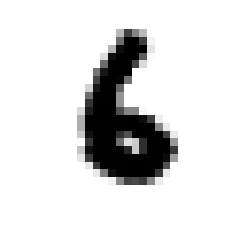

In [10]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [11]:
y[360]

'6'

In [24]:
x_train,x_test=x[:600],x[600:700]

In [25]:
y_train,y_test=y[:600],y[600:700]

In [26]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]


IndexError: index 57669 is out of bounds for axis 0 with size 600

In [27]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

y_train_9=(y_train==9)
y_test_9=(y_test==9)


In [28]:
y_train

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf=LogisticRegression(tol=0.1,solver='lbfgs')

In [31]:
clf.fit(x_train,y_train_9)

LogisticRegression(tol=0.1)

In [32]:
clf.predict([some_digit])

array([False])

In [33]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_9,cv=3,scoring="accuracy")

In [34]:
a.mean()

0.94

In [35]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,x_train,y_train_9,cv=3)


In [36]:
y_train_pred

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_train_9,y_train_pred)

array([[520,  15],
       [ 21,  44]], dtype=int64)

In [40]:
confusion_matrix(y_train_9,y_train_9)

array([[535,   0],
       [  0,  65]], dtype=int64)

In [41]:
from sklearn.metrics import precision_score,recall_score

In [42]:
precision_score(y_train_9,y_train_pred)

0.7457627118644068

In [43]:
recall_score(y_train_9,y_train_pred)

0.676923076923077

In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [45]:
f1_score(y_train_9,y_train_pred)

0.7096774193548386

In [46]:
from sklearn.metrics import precision_recall_curve

In [50]:
y_scores=cross_val_predict(clf,x_train,y_train_9,cv=3,method="decision_function")

In [54]:
y_scores

array([ -38.3920655 ,  -58.4918868 ,  -18.08413569,  -35.15650292,
          6.31734   ,  -15.5291011 ,  -38.45113699,  -24.95218725,
        -32.31053742,  -29.3862346 ,  -25.64930006,  -47.67153116,
        -41.77004731,  -44.89935823,  -39.10608566,    0.3682499 ,
        -21.65642874,  -13.7587827 ,  -20.67010519,   10.50020129,
          6.78461953,  -76.29506805,   10.74432654,  -29.58222362,
        -15.07952097,  -78.70866719,   -5.25359228,  -62.49976859,
        -75.0804273 ,   -8.15891519,  -34.12098154,  -27.40209082,
        -25.9630954 ,   -1.77031557,  -46.46916585,  -26.14946215,
        -28.56367676,  -54.09841926,  -24.91850234,  -34.5184749 ,
        -20.98743216,  -32.84491902,  -10.64372227,    1.95877578,
        -30.49041445,   11.16806316,   -9.39718385,  -24.00527014,
        -32.47249747,  -46.55778468,  -41.57171653,  -72.39426809,
        -20.62396256,   -8.61753412,   -1.74005754,  -27.52517995,
        -65.15779723,   20.1015599 ,    6.5516159 ,  -29.82591

In [58]:
precisions,recalls,thresholds= precision_recall_curve(y_train_9,y_scores)

In [68]:
precisions

array([0.11586453, 0.11428571, 0.11449016, 0.11469534, 0.11490126,
       0.11510791, 0.11531532, 0.11552347, 0.11573237, 0.11594203,
       0.11615245, 0.11636364, 0.11657559, 0.11678832, 0.11700183,
       0.11721612, 0.11743119, 0.11764706, 0.11786372, 0.11808118,
       0.11829945, 0.11851852, 0.1187384 , 0.11895911, 0.11918063,
       0.11940299, 0.11962617, 0.11985019, 0.12007505, 0.12030075,
       0.12052731, 0.12075472, 0.12098299, 0.12121212, 0.12144213,
       0.121673  , 0.12190476, 0.1221374 , 0.12237094, 0.12260536,
       0.12284069, 0.12307692, 0.12331407, 0.12355212, 0.1237911 ,
       0.12403101, 0.12427184, 0.12451362, 0.12475634, 0.125     ,
       0.12524462, 0.1254902 , 0.12573674, 0.12598425, 0.12623274,
       0.12648221, 0.12673267, 0.12698413, 0.12723658, 0.12749004,
       0.12774451, 0.128     , 0.12825651, 0.12851406, 0.12877264,
       0.12903226, 0.12929293, 0.12955466, 0.12981744, 0.1300813 ,
       0.13034623, 0.13061224, 0.13087935, 0.13114754, 0.13141

In [69]:
thresholds

array([-72.82470076, -72.62827675, -72.60120603, -72.5932003 ,
       -72.39426809, -70.99242385, -69.40070919, -69.38754596,
       -68.96938436, -68.65058038, -67.71664644, -67.33335887,
       -66.99730329, -66.55650018, -66.47991822, -66.43335464,
       -65.91612448, -65.60013214, -65.26541389, -65.15779723,
       -65.07491133, -64.76413743, -64.21651845, -63.52967471,
       -63.39171065, -63.20157179, -63.05450899, -62.94687203,
       -62.49976859, -62.41040064, -62.20940246, -61.70912742,
       -61.48759827, -61.04801745, -61.04703329, -60.424921  ,
       -60.0771773 , -60.06026582, -59.9850353 , -59.76319197,
       -59.60098332, -59.54553054, -59.49169923, -58.97594094,
       -58.61922826, -58.4918868 , -57.7611789 , -57.49938479,
       -57.41647693, -56.8500576 , -56.77436538, -56.74373545,
       -56.70604763, -56.57336655, -56.51857417, -56.31101261,
       -55.56839779, -55.54611015, -55.47520836, -55.25301897,
       -55.08524612, -54.58947193, -54.57183418, -54.39

In [70]:
recalls

array([1.        , 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461538,
       0.98461538, 0.98461538, 0.98461538, 0.98461538, 0.98461

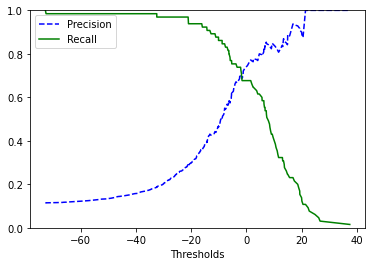

In [73]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()